In [ ]:
# TAREA 5 - Agrupamiento

In [3]:
'''
Librerias a utilizar
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/movies.csv')
df

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,9/23/1994,26.9579,8.712,28675
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",3/14/1972,26.5804,8.686,21701
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,12/20/1974,15.6559,8.571,13099
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,12/15/1993,12.5642,8.565,16616
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,4/10/1957,14.6028,8.549,9307
...,...,...,...,...,...,...,...,...
8555,8555,238603,Earth to Echo,After a construction project begins digging in...,6/14/2014,1.6137,5.900,593
8556,8556,11968,Into the Blue,When they take some friends on an extreme spor...,9/30/2005,3.3432,5.902,1539
8557,8557,439079,The Nun,A priest with a haunted past and a novice on t...,9/5/2018,15.1733,5.901,6862
8558,8558,513409,Earthquake Bird,"Tokyo, Japan, 1989. Lucy Fly, a foreigner who ...",11/1/2019,1.1859,5.900,448


In [ ]:
'''
Código correspondiente a la instrucción de la tarea:
Aplicar al menos un algoritmo no supervisado a tus datos para encontrar estructuras subyacentes
'''

Buscando la mejor combinación de parámetros...

eps=0.2, min_samples=3, clusters=66, DBI=0.88
eps=0.2, min_samples=5, clusters=25, DBI=0.919
eps=0.2, min_samples=10, clusters=9, DBI=0.763
eps=0.5, min_samples=3, clusters=14, DBI=0.89
eps=0.5, min_samples=5, clusters=4, DBI=0.558
eps=0.5, min_samples=10, clusters=2, DBI=0.362
eps=0.8, min_samples=3, clusters=3, DBI=0.538
eps=0.8, min_samples=5, clusters=2, DBI=0.394
eps=1.0, min_samples=3, clusters=3, DBI=0.585
eps=1.0, min_samples=5, clusters=2, DBI=0.614
eps=1.5, min_samples=3, clusters=4, DBI=0.25
eps=1.5, min_samples=5, clusters=2, DBI=0.157
eps=2.0, min_samples=3, clusters=4, DBI=0.443
eps=2.0, min_samples=5, clusters=3, DBI=0.181

--- Mejor configuración encontrada ---
eps = 1.5, min_samples = 5, DBI = 0.157

Conteo de películas por cluster:
cluster
 0    8522
-1      31
 1       7
Name: count, dtype: int64


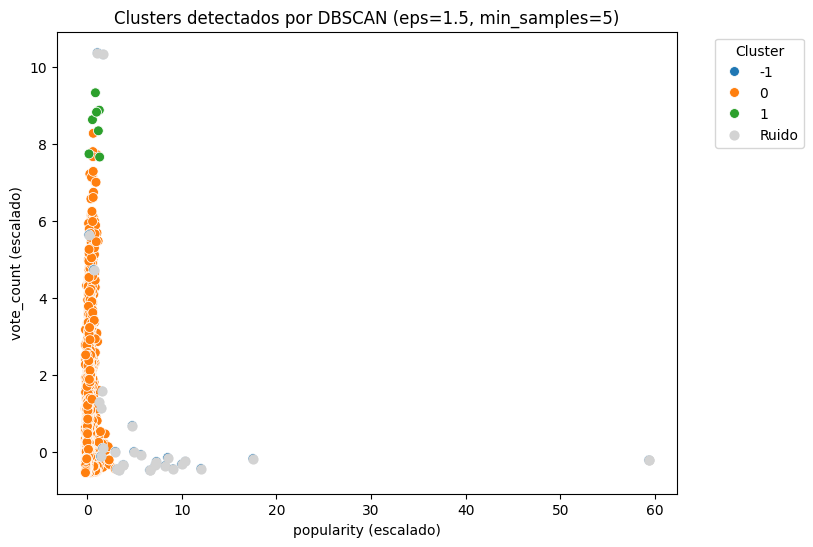

In [9]:
# Seleccionar solamente las columnas numéricas relevantes para nuestra investigación
X = df.select_dtypes(include=[np.number]).dropna()
X_scaled = StandardScaler().fit_transform(X)

# Búsqueda de parámetros: combinaciones de eps y min_samples
mejor_eps, mejor_min, mejor_dbi = None, None, np.inf
mejor_labels = None

print("Buscando la mejor combinación de parámetros...\n")

for eps in [0.2, 0.5, 0.8, 1.0, 1.5, 2.0]:
    for min_samples in [3, 5, 10]:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        # Calcular DBI solo si hay al menos 2 clusters
        if n_clusters > 1:
            mask = labels != -1
            dbi = davies_bouldin_score(X_scaled[mask], labels[mask])

            print(f"eps={eps}, min_samples={min_samples}, clusters={n_clusters}, DBI={round(dbi,3)}")

            # Guardar la mejor configuración (menor DBI)
            if dbi < mejor_dbi:
                mejor_dbi = dbi
                mejor_eps = eps
                mejor_min = min_samples
                mejor_labels = labels

print("\n--- Mejor configuración encontrada ---")
print(f"eps = {mejor_eps}, min_samples = {mejor_min}, DBI = {round(mejor_dbi,3)}")

# Asignar los clusters al DataFrame
df["cluster"] = mejor_labels

# Conteo de películas por cluster
print("\nConteo de películas por cluster:")
print(df["cluster"].value_counts())

# --- Visualización de los clusters obtenidos ---
plt.figure(figsize=(8,6))

# Convertimos X_scaled a DataFrame para graficar con etiquetas
X_plot = pd.DataFrame(X_scaled, columns=X.columns)
X_plot["cluster"] = df["cluster"]

# Determinar qué variables usar para graficar
if "popularity" in X.columns and "vote_count" in X.columns:
    xvar, yvar = "popularity", "vote_count"
else:
    xvar, yvar = X.columns[:2]

# Graficar los clusters
sns.scatterplot(
    data=X_plot,
    x=xvar,
    y=yvar,
    hue="cluster",
    palette="tab10",
    s=50
)

# Resaltar puntos de ruido
plt.scatter(
    X_plot.loc[X_plot["cluster"] == -1, xvar],
    X_plot.loc[X_plot["cluster"] == -1, yvar],
    c="lightgray", label="Ruido", s=40
)

plt.title(f"Clusters detectados por DBSCAN (eps={mejor_eps}, min_samples={mejor_min})")
plt.xlabel(f"{xvar} (escalado)")
plt.ylabel(f"{yvar} (escalado)")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
